This model is just a basic working placeholder which has to be improved and made better. Observed insights are taken from the data and to be worked upon in later stages of development.

### Libraries and Data

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('ipl.csv')

In [ ]:
data

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


### Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [ ]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


Some of the less informative columns can be removed. For prediction purposes, date has no significance. Object type columns Batsman and Bowler have too many categories to be encoded effectively for this demonstration purpose.

In [ ]:
data = data.drop(['mid','date','batsman', 'bowler'], axis=1)

In [ ]:
data

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,0,0,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,0,0,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,0,0,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,0,0,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,40,12,129
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,46,12,129
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,47,12,129
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,47,13,129


In [ ]:
data.isnull().sum()

venue             0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

Let's add a new feature called run_rate

In [ ]:
data['rr'] = data['runs']/((data['overs']-data['overs']%1)+ (data['overs']%1)*(10/6))

In [ ]:
data.isnull().sum()

venue             0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
rr                0
dtype: int64

In [ ]:
data.describe()

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,rr
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,7.601400e+04
mean,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452,inf
std,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,0.000000e+00
25%,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000,6.000000e+00
50%,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000,7.232877e+00
75%,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000,8.400000e+00
max,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000,inf


In [ ]:
data['rr'].isnull().sum()

0

there is no Nan in sr but inf value is there. We shall impute it with Nan and drop all such rows.

In [ ]:
data['rr'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
data['rr'].isnull().sum()

37

In [ ]:
data.dropna(inplace=True)

In [ ]:
data

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,rr
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,0,0,222,6.000000
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,0,0,222,3.000000
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,0,0,222,6.000000
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,0,0,222,4.000000
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,0,0,222,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,40,12,129,6.258621
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,46,12,129,6.512821
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,47,12,129,6.508475
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,47,13,129,6.504202


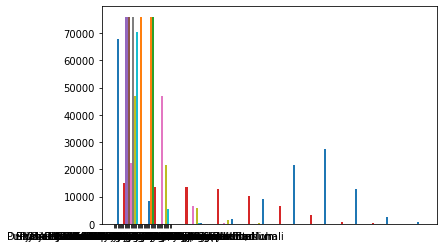

In [ ]:
plt.hist(data[np.isfinite(data['rr'])].values)
plt.show()

In [ ]:
data.max()

venue                Wankhede Stadium
bat_team          Sunrisers Hyderabad
bowl_team         Sunrisers Hyderabad
runs                              263
wickets                            10
overs                            19.6
runs_last_5                       113
wickets_last_5                      7
striker                           175
non-striker                       109
total                             263
rr                                 66
dtype: object

Categorical Encoding

Object type Columns "venue", "bat_team" and "bowl_team" are important for the results. They can be encoded using OneHot Encoder but that will add up a lot many new columns which may pose a risk of overfitting. There are research papers suggesting that when applied to the same model and data, binary encoding gives as good a result as OneHotEncoding.
So in order to avoid making too many features as a result of encoding, we decided to go with BinaryEncoder for 'venue', 'bat_team' and 'bowl_team'. 

In [ ]:
pip install category_encoders

In [ ]:
import category_encoders as ce
encoder = ce.BinaryEncoder(['venue'])
databin = encoder.fit_transform(data['venue'])
data = pd.concat([data, databin], axis=1)
data

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,rr,venue_0,venue_1,venue_2,venue_3,venue_4,venue_5,venue_6
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,0,0,222,6.000000,0,0,0,0,0,0,1
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,0,0,222,3.000000,0,0,0,0,0,0,1
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,0,0,222,6.000000,0,0,0,0,0,0,1
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,0,0,222,4.000000,0,0,0,0,0,0,1
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,0,0,222,3.000000,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,40,12,129,6.258621,0,0,0,0,1,1,1
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,46,12,129,6.512821,0,0,0,0,1,1,1
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,47,12,129,6.508475,0,0,0,0,1,1,1
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,47,13,129,6.504202,0,0,0,0,1,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75977 entries, 0 to 76013
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   venue           75977 non-null  object 
 1   bat_team        75977 non-null  object 
 2   bowl_team       75977 non-null  object 
 3   runs            75977 non-null  int64  
 4   wickets         75977 non-null  int64  
 5   overs           75977 non-null  float64
 6   runs_last_5     75977 non-null  int64  
 7   wickets_last_5  75977 non-null  int64  
 8   striker         75977 non-null  int64  
 9   non-striker     75977 non-null  int64  
 10  total           75977 non-null  int64  
 11  rr              75977 non-null  float64
 12  venue_0         75977 non-null  int64  
 13  venue_1         75977 non-null  int64  
 14  venue_2         75977 non-null  int64  
 15  venue_3         75977 non-null  int64  
 16  venue_4         75977 non-null  int64  
 17  venue_5         75977 non-null 

In [ ]:
import category_encoders as ce
encoder = ce.BinaryEncoder(['bat_team'])
databin = encoder.fit_transform(data['bat_team'])
data = pd.concat([data, databin], axis=1)
data

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,rr,venue_0,venue_1,venue_2,venue_3,venue_4,venue_5,venue_6,bat_team_0,bat_team_1,bat_team_2,bat_team_3,bat_team_4
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,0,0,222,6.000000,0,0,0,0,0,0,1,0,0,0,0,1
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,0,0,222,3.000000,0,0,0,0,0,0,1,0,0,0,0,1
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,0,0,222,6.000000,0,0,0,0,0,0,1,0,0,0,0,1
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,0,0,222,4.000000,0,0,0,0,0,0,1,0,0,0,0,1
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,0,0,222,3.000000,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,40,12,129,6.258621,0,0,0,0,1,1,1,0,0,1,0,0
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,46,12,129,6.512821,0,0,0,0,1,1,1,0,0,1,0,0
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,47,12,129,6.508475,0,0,0,0,1,1,1,0,0,1,0,0
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,47,13,129,6.504202,0,0,0,0,1,1,1,0,0,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75977 entries, 0 to 76013
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   venue           75977 non-null  object 
 1   bat_team        75977 non-null  object 
 2   bowl_team       75977 non-null  object 
 3   runs            75977 non-null  int64  
 4   wickets         75977 non-null  int64  
 5   overs           75977 non-null  float64
 6   runs_last_5     75977 non-null  int64  
 7   wickets_last_5  75977 non-null  int64  
 8   striker         75977 non-null  int64  
 9   non-striker     75977 non-null  int64  
 10  total           75977 non-null  int64  
 11  rr              75977 non-null  float64
 12  venue_0         75977 non-null  int64  
 13  venue_1         75977 non-null  int64  
 14  venue_2         75977 non-null  int64  
 15  venue_3         75977 non-null  int64  
 16  venue_4         75977 non-null  int64  
 17  venue_5         75977 non-null 

In [ ]:
import category_encoders as ce
encoder = ce.BinaryEncoder(['bowl_team'])
databin = encoder.fit_transform(data['bowl_team'])
data = pd.concat([data, databin], axis=1)
data

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,rr,venue_0,venue_1,venue_2,venue_3,venue_4,venue_5,venue_6,bat_team_0,bat_team_1,bat_team_2,bat_team_3,bat_team_4,bowl_team_0,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,0,0,222,6.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,0,0,222,3.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,0,0,222,6.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,0,0,222,4.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,0,0,222,3.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,40,12,129,6.258621,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,46,12,129,6.512821,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,47,12,129,6.508475,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,47,13,129,6.504202,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75977 entries, 0 to 76013
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   venue           75977 non-null  object 
 1   bat_team        75977 non-null  object 
 2   bowl_team       75977 non-null  object 
 3   runs            75977 non-null  int64  
 4   wickets         75977 non-null  int64  
 5   overs           75977 non-null  float64
 6   runs_last_5     75977 non-null  int64  
 7   wickets_last_5  75977 non-null  int64  
 8   striker         75977 non-null  int64  
 9   non-striker     75977 non-null  int64  
 10  total           75977 non-null  int64  
 11  rr              75977 non-null  float64
 12  venue_0         75977 non-null  int64  
 13  venue_1         75977 non-null  int64  
 14  venue_2         75977 non-null  int64  
 15  venue_3         75977 non-null  int64  
 16  venue_4         75977 non-null  int64  
 17  venue_5         75977 non-null 

In [ ]:
data.head(260)

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,rr,venue_0,venue_1,venue_2,venue_3,venue_4,venue_5,venue_6,bat_team_0,bat_team_1,bat_team_2,bat_team_3,bat_team_4,bowl_team_0,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,0,0,222,6.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,0,0,222,3.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,0,0,222,6.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,0,0,222,4.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,0,0,222,3.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,8,0,1.1,8,0,6,1,129,6.857143,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1
256,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,8,0,1.2,8,0,6,1,129,6.000000,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1
257,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,8,0,1.3,8,0,6,1,129,5.333333,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1
258,Feroz Shah Kotla,Rajasthan Royals,Delhi Daredevils,9,0,1.4,9,0,7,1,129,5.400000,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1


In [ ]:
data['venue'].value_counts()

M Chinnaswamy Stadium                                   7441
Feroz Shah Kotla                                        7067
Eden Gardens                                            7046
Wankhede Stadium                                        7046
MA Chidambaram Stadium, Chepauk                         5965
Rajiv Gandhi International Stadium, Uppal               5826
Punjab Cricket Association Stadium, Mohali              4245
Sawai Mansingh Stadium                                  4109
Dr DY Patil Sports Academy                              2087
Subrata Roy Sahara Stadium                              2085
Maharashtra Cricket Association Stadium                 1841
Kingsmead                                               1731
Sardar Patel Stadium, Motera                            1484
Brabourne Stadium                                       1377
SuperSport Park                                         1375
Punjab Cricket Association IS Bindra Stadium, Mohali    1342
Saurashtra Cricket Assoc

Finally after encoding, we ended up with 27 columns out of which 3 are redundant originals and 1 is target column. So there are 24 feature columns.

In [ ]:
df = data.drop(['venue','bat_team', 'bowl_team'], axis=1)

I'll later have to come back and visualize the encoded pattern to be used for HTML input.

### EDA


distribution of each feature column

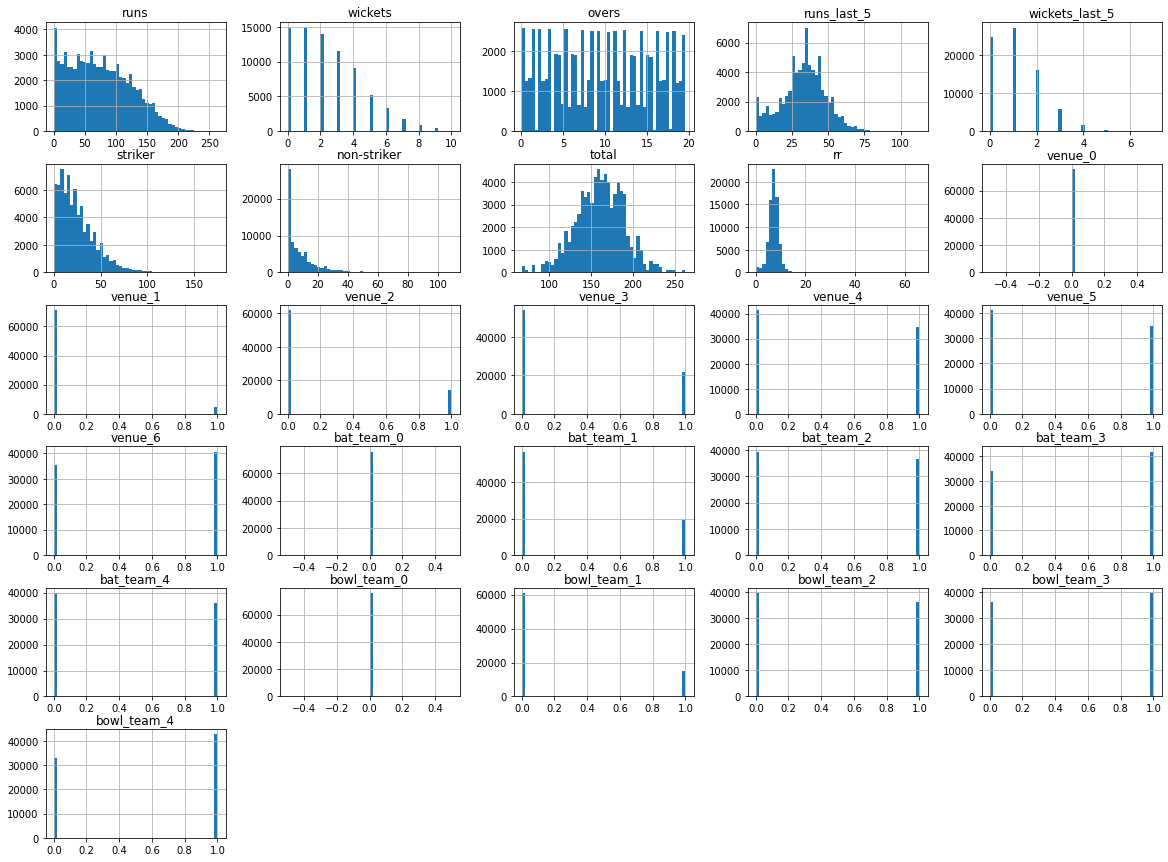

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

TBH no findings here. Just that some of the features have constant values throughout. THEY MUST ALL DIE!!

In [ ]:
df = df.drop(['venue_0', 'bat_team_0', 'bowl_team_0'], axis=1)

In [ ]:
df

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,rr,venue_1,venue_2,venue_3,venue_4,venue_5,venue_6,bat_team_1,bat_team_2,bat_team_3,bat_team_4,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
0,1,0,0.1,1,0,0,0,222,6.000000,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,1,0,0.2,1,0,0,0,222,3.000000,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,2,0,0.2,2,0,0,0,222,6.000000,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,2,0,0.3,2,0,0,0,222,4.000000,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,2,0,0.4,2,0,0,0,222,3.000000,0,0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,121,7,19.2,40,0,40,12,129,6.258621,0,0,0,1,1,1,0,1,0,0,1,1,1,0
76010,127,7,19.3,46,0,46,12,129,6.512821,0,0,0,1,1,1,0,1,0,0,1,1,1,0
76011,128,7,19.4,47,0,47,12,129,6.508475,0,0,0,1,1,1,0,1,0,0,1,1,1,0
76012,129,7,19.5,48,0,47,13,129,6.504202,0,0,0,1,1,1,0,1,0,0,1,1,1,0


Correlation of features with Total Score

In [ ]:
df.corr()['total'].sort_values()

wickets          -0.337416
wickets_last_5   -0.273506
venue_3          -0.130892
venue_4          -0.099074
bat_team_1       -0.060211
bowl_team_2      -0.059253
venue_6          -0.045118
venue_2          -0.041050
venue_5          -0.026509
bat_team_4       -0.015796
bowl_team_1      -0.011330
bowl_team_4       0.018386
overs             0.022440
bowl_team_3       0.032148
venue_1           0.052469
bat_team_3        0.056845
bat_team_2        0.066630
runs              0.254801
non-striker       0.293394
runs_last_5       0.368893
striker           0.381967
rr                0.464813
total             1.000000
Name: total, dtype: float64

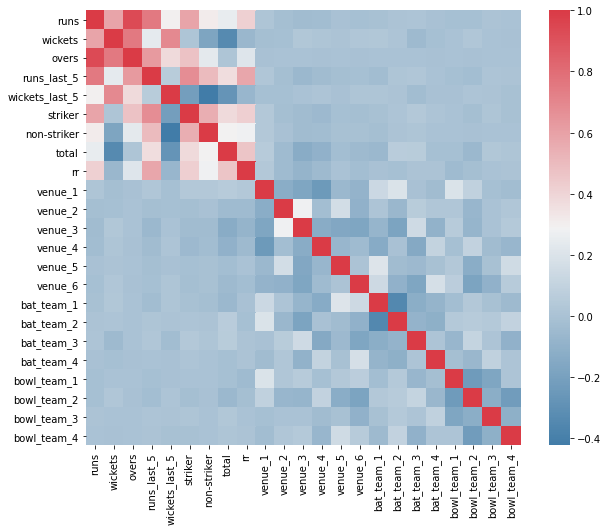

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

Let's zoom in the data with a new dataframe to closely capture correlation

In [ ]:
df_cor = df.drop(['venue_1', 'venue_2', 'venue_3', 'venue_4', 'venue_5', 'venue_6', 'bat_team_1', 'bat_team_2', 'bat_team_3', 'bat_team_4', 'bowl_team_1', 'bowl_team_2', 'bowl_team_3', 'bowl_team_4'], axis=1)

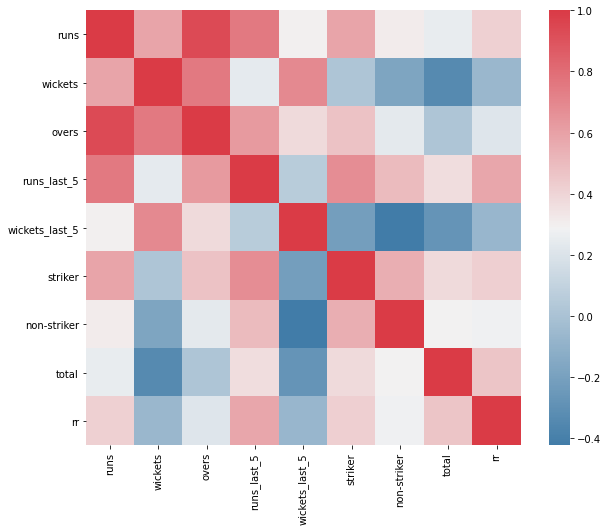

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_cor.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [ ]:
df_cor.corr()['total'].sort_values()

wickets          -0.337416
wickets_last_5   -0.273506
overs             0.022440
runs              0.254801
non-striker       0.293394
runs_last_5       0.368893
striker           0.381967
rr                0.464813
total             1.000000
Name: total, dtype: float64

see the relative distribution of total with different features

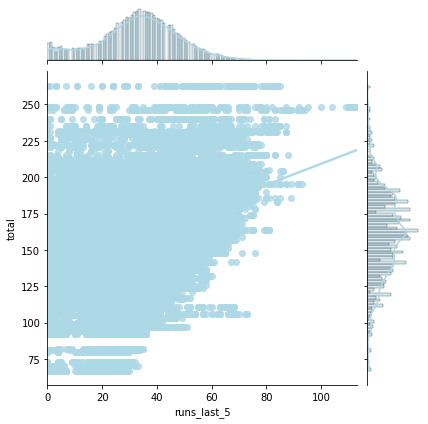

In [ ]:
sns.jointplot(x="runs_last_5", y = "total", data=df, kind='reg', color = 'lightblue')

This reassures the positive trend shown in heatmap. With increasing values of runs_last_5 we do get higher total scores. 



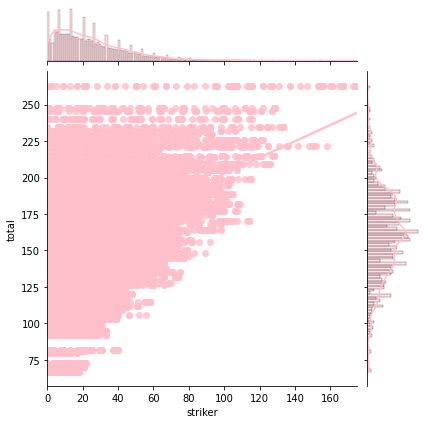

In [ ]:
sns.jointplot(x="striker", y = "total", data=df, kind = 'reg', color = 'pink')

This one show out a very interesting trend that we seem to also realize in real time matches: if high scoring (well set) batsman is at strike, you can expect the total to go high. 

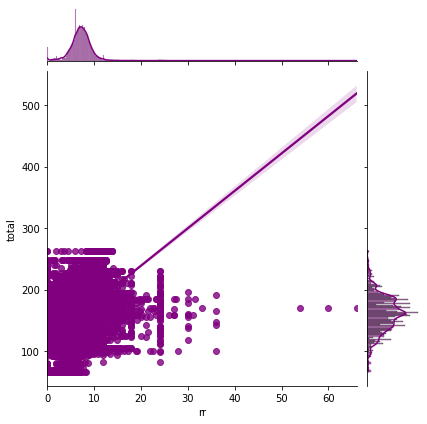

In [ ]:
sns.jointplot(x="rr", y = "total", data=df, kind = 'reg', color = 'purple')

The very high slope indicates the very strong correlation between the strike rate and total.

In [ ]:
sns.jointplot(x="rr", y = "total", data=df, kind = 'kde', color = 'purple')

In [ ]:
sns.jointplot(x="rr", y = "total", data=df, kind = 'hex', color = 'purple')

In [ ]:
sns.jointplot(x="rr", y = "total", data=df, kind = 'scatter', color = 'purple')

### Data Splitting and Scaling

In [ ]:
df

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,rr,venue_1,venue_2,venue_3,venue_4,venue_5,venue_6,bat_team_1,bat_team_2,bat_team_3,bat_team_4,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
0,1,0,0.1,1,0,0,0,222,6.000000,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,1,0,0.2,1,0,0,0,222,3.000000,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,2,0,0.2,2,0,0,0,222,6.000000,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,2,0,0.3,2,0,0,0,222,4.000000,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,2,0,0.4,2,0,0,0,222,3.000000,0,0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,121,7,19.2,40,0,40,12,129,6.258621,0,0,0,1,1,1,0,1,0,0,1,1,1,0
76010,127,7,19.3,46,0,46,12,129,6.512821,0,0,0,1,1,1,0,1,0,0,1,1,1,0
76011,128,7,19.4,47,0,47,12,129,6.508475,0,0,0,1,1,1,0,1,0,0,1,1,1,0
76012,129,7,19.5,48,0,47,13,129,6.504202,0,0,0,1,1,1,0,1,0,0,1,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('total', axis = 1)
y = df['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [ ]:
X_train

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,rr,venue_1,venue_2,venue_3,venue_4,venue_5,venue_6,bat_team_1,bat_team_2,bat_team_3,bat_team_4,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
19921,88,2,12.5,30,1,31,0,6.857143,0,1,0,1,1,0,0,1,1,0,1,0,0,0
19076,101,8,17.4,26,3,24,4,5.716981,0,0,0,0,1,1,1,0,0,0,0,0,1,0
7756,48,3,5.4,44,3,15,0,8.470588,0,0,1,1,0,0,0,1,1,1,0,0,1,0
8116,16,1,3.2,16,1,10,5,4.800000,0,0,1,0,1,0,0,1,1,0,0,1,0,1
30425,41,2,6.5,26,2,6,2,6.000000,0,1,1,0,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39388,89,7,18.4,35,1,20,4,4.767857,0,1,1,0,1,0,1,0,1,0,0,0,1,0
29032,123,3,15.3,33,0,39,36,7.935484,0,0,0,1,0,1,0,0,0,1,0,1,1,0
23866,171,4,19.5,54,2,6,0,8.621849,0,0,0,1,0,1,0,0,0,1,0,0,0,1
42980,7,0,1.1,7,0,6,1,6.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[X_train.columns] = sc.fit_transform(X_train)
X_test[X_test.columns] = sc.fit_transform(X_test)

In [ ]:
X_test

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,rr,venue_1,venue_2,venue_3,venue_4,venue_5,venue_6,bat_team_1,bat_team_2,bat_team_3,bat_team_4,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
39704,0.099290,-0.210744,-0.037703,1.258702,-1.066526,1.539685,0.583406,0.351204,-0.264955,-0.483655,-0.642980,1.095339,-0.913832,-1.069874,-0.577208,1.039254,-1.109991,-0.953640,-0.495801,-0.955755,0.956562,0.885099
57118,-0.965605,-0.705991,-0.971827,-0.352926,-0.118885,-0.549391,-0.637056,-0.330272,-0.264955,2.067589,-0.642980,-0.912959,1.094293,0.934689,-0.577208,-0.962229,0.900908,-0.953640,-0.495801,1.046293,-1.045410,0.885099
71490,-1.272787,-1.201238,-1.456188,-1.360194,-1.066526,-0.897571,-0.261529,0.262612,-0.264955,2.067589,1.555258,-0.912959,-0.913832,-1.069874,-0.577208,1.039254,0.900908,-0.953640,-0.495801,1.046293,0.956562,-1.129817
22590,-0.289806,-0.705991,-0.279883,0.318585,-0.118885,0.544887,0.301761,0.049992,-0.264955,-0.483655,-0.642980,1.095339,-0.913832,-1.069874,-0.577208,1.039254,-1.109991,-0.953640,2.016937,-0.955755,0.956562,-1.129817
41191,-0.269328,1.770244,0.308269,-0.084322,0.828755,0.146968,-0.167648,-0.903849,-0.264955,2.067589,1.555258,-0.912959,1.094293,-1.069874,1.732476,-0.962229,0.900908,1.048614,2.016937,-0.955755,-1.045410,0.885099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29702,-1.129435,-0.705991,-1.300501,-0.890136,-0.118885,-0.947310,-0.449293,0.351204,-0.264955,-0.483655,-0.642980,1.095339,-0.913832,0.934689,-0.577208,-0.962229,-1.109991,1.048614,-0.495801,-0.955755,0.956562,0.885099
24865,1.491845,2.265491,1.692157,0.520039,0.828755,1.788385,-0.543174,0.085428,-0.264955,-0.483655,-0.642980,-0.912959,1.094293,0.934689,-0.577208,-0.962229,-1.109991,1.048614,-0.495801,-0.955755,0.956562,0.885099
42915,-0.125976,1.770244,0.117985,0.318585,-1.066526,-0.101732,0.865051,-0.371161,-0.264955,-0.483655,-0.642980,1.095339,1.094293,-1.069874,1.732476,-0.962229,0.900908,1.048614,-0.495801,1.046293,-1.045410,0.885099
74083,-1.047520,-0.705991,-0.902633,-0.621531,-0.118885,-0.599131,0.113997,-1.066268,-0.264955,-0.483655,-0.642980,1.095339,1.094293,0.934689,1.732476,1.039254,0.900908,-0.953640,2.016937,-0.955755,0.956562,0.885099


### Model Selection

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

def evaluation(model, X_train, y_train, X_test, y_test, train = True):
    """
    A function that returns the score of every evaluation metrics
    """
    if train == True:
        pred = model.predict(X_train)
        print("Train Result:\n================================================")
        print(f"mean absolute error: {mean_absolute_error(y_train, pred)}")
        print("_______________________________________________")
        print(f"root mean squared error: {np.sqrt(mean_squared_error(y_train, pred))}")
        print("_______________________________________________")
        print(f"r2 Score: {round(r2_score(y_train, pred), 2)}")
        
    if train == False:
        pred = model.predict(X_test)
        print("Test Result:\n================================================")
        print(f"mean absolute error: {mean_absolute_error(y_test, pred)}")
        print("_______________________________________________")
        print(f"root mean squared error: {np.sqrt(mean_squared_error(y_test, pred))}")
        print("_______________________________________________")
        print(f"r2 Score: {round(r2_score(y_test, pred), 2)}")


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_test, y_test, True)
print()
evaluation(lr, X_train, y_train, X_test, y_test, False)

Train Result:
mean absolute error: 14.934425025658266
_______________________________________________
root mean squared error: 20.208804698007416
_______________________________________________
r2 Score: 0.52

Test Result:
mean absolute error: 14.814569860962393
_______________________________________________
root mean squared error: 20.116168834331585
_______________________________________________
r2 Score: 0.53


Random Forest

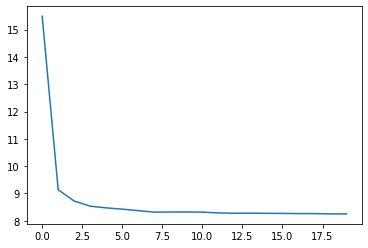

In [ ]:
from sklearn.ensemble import RandomForestRegressor
## Finding out the right number of estimators
root_mean_squared_error = []
for i in range(1, 200, 10):
    rfc = RandomForestRegressor(n_estimators = i, random_state = 0)
    rfc.fit(X_train, y_train)
    root_mean_squared_error.append(np.sqrt(mean_squared_error(y_test, rfc.predict(X_test))))
plt.plot(root_mean_squared_error)

In [ ]:
rfc = RandomForestRegressor(n_estimators = 25, random_state = 0)
rfc.fit(X_train, y_train)

evaluation(rfc, X_train, y_train, X_test, y_test, True)
print()
evaluation(rfc, X_train, y_train, X_test, y_test, False)

Train Result:
mean absolute error: 1.723998189068896
_______________________________________________
root mean squared error: 3.6775281098449675
_______________________________________________
r2 Score: 0.98

Test Result:
mean absolute error: 4.297177886411211
_______________________________________________
root mean squared error: 8.634258510317414
_______________________________________________
r2 Score: 0.91


### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

RFC = RandomForestRegressor()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 31.3min
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed: 66.2min finished


0.9468384416373354

### Data Prep

In [ ]:
data

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,venue_0,venue_1,venue_2,venue_3,venue_4,venue_5,venue_6,bat_team_0,bat_team_1,bat_team_2,bat_team_3,bat_team_4,bowl_team_0,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
0,1,0,0.1,1,0,0,0,222,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,0,0.2,1,0,0,0,222,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,2,0,0.2,2,0,0,0,222,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,2,0,0.3,2,0,0,0,222,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,2,0,0.4,2,0,0,0,222,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,121,7,19.2,40,0,40,12,129,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0
76010,127,7,19.3,46,0,46,12,129,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0
76011,128,7,19.4,47,0,47,12,129,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0
76012,129,7,19.5,48,0,47,13,129,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0


In [ ]:
data.describe()

,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,venue_0,venue_1,venue_2,venue_3,venue_4,venue_5,venue_6,bat_team_0,bat_team_1,bat_team_2,bat_team_3,bat_team_4,bowl_team_0,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.0,76014.000000,76014.00000,76014.000000,76014.000000,76014.000000,76014.000000,76014.0,76014.000000,76014.000000,76014.000000,76014.000000,76014.0,76014.000000,76014.000000,76014.000000,76014.000000
mean,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452,0.0,0.064541,0.18636,0.289328,0.455732,0.458771,0.535612,0.0,0.251967,0.480227,0.552438,0.474978,0.0,0.196687,0.477688,0.522338,0.563291
std,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231,0.0,0.245715,0.38940,0.453454,0.498040,0.498301,0.498733,0.0,0.434145,0.499612,0.497246,0.499377,0.0,0.397497,0.499505,0.499504,0.495981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000
75%,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000,0.0,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.000000
max,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000,0.0,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [ ]:
corr_matrix = data.corr()
corr_matrix['total'].sort_values(ascending=False)

total             1.000000
striker           0.381664
runs_last_5       0.368253
non-striker       0.293233
runs              0.254498
bat_team_2        0.066662
bat_team_3        0.056777
venue_1           0.052495
bowl_team_3       0.032140
overs             0.022282
bowl_team_4       0.018403
bowl_team_1      -0.011265
bat_team_4       -0.015772
venue_5          -0.026433
venue_2          -0.040936
venue_6          -0.045109
bowl_team_2      -0.059228
bat_team_1       -0.060182
venue_4          -0.099029
venue_3          -0.130893
wickets_last_5   -0.273475
wickets          -0.337343
venue_0                NaN
bat_team_0             NaN
bowl_team_0            NaN
Name: total, dtype: float64

Correlation matrix suggests that most of the encoded features have very low correlations with the target. Even the other features don't have very high correlation values. Fetures can be modified for higher correlation value.

Shifting the target column for ease of split during features and target assignment.

In [ ]:
df = data[['total']]
df

,total
0,222
1,222
2,222
3,222
4,222
...,...
76009,129
76010,129
76011,129
76012,129


In [ ]:
Data = data.drop('total', axis=1)

In [ ]:
data = df.join(Data, lsuffix='_caller', rsuffix='_other')

In [ ]:
data

,total,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,venue_0,venue_1,venue_2,venue_3,venue_4,venue_5,venue_6,bat_team_0,bat_team_1,bat_team_2,bat_team_3,bat_team_4,bowl_team_0,bowl_team_1,bowl_team_2,bowl_team_3,bowl_team_4
0,222,1,0,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,222,1,0,0.2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,222,2,0,0.2,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,222,2,0,0.3,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,222,2,0,0.4,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,129,121,7,19.2,40,0,40,12,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0
76010,129,127,7,19.3,46,0,46,12,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0
76011,129,128,7,19.4,47,0,47,12,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0
76012,129,129,7,19.5,48,0,47,13,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0


In [ ]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [ ]:
X

array([[1.00e+00, 0.00e+00, 1.00e-01, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 0.00e+00, 2.00e-01, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [2.00e+00, 0.00e+00, 2.00e-01, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [1.28e+02, 7.00e+00, 1.94e+01, ..., 1.00e+00, 1.00e+00, 0.00e+00],
       [1.29e+02, 7.00e+00, 1.95e+01, ..., 1.00e+00, 1.00e+00, 0.00e+00],
       [1.29e+02, 8.00e+00, 1.96e+01, ..., 1.00e+00, 1.00e+00, 0.00e+00]])

### Training

Spliting the dataset into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Standardization of the input range for rescaling the distribution of values to a standard scale

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [ ]:
X_train

array([[-0.6730424 , -0.70146605, -0.61975026, ...,  1.04410538,
        -1.04599943, -1.13453057],
       [-0.40669723,  0.7919469 ,  0.31638817, ...,  1.04410538,
        -1.04599943,  0.88142182],
       [ 0.02355266,  0.7919469 ,  0.80179328, ..., -0.95775773,
         0.95602346, -1.13453057],
       ...,
       [-0.75499476, -0.70146605, -0.9317964 , ...,  1.04410538,
         0.95602346, -1.13453057],
       [-1.12378037, -1.19927037, -1.59056048, ..., -0.95775773,
         0.95602346, -1.13453057],
       [-0.22230442, -0.20366173, -0.22102463, ..., -0.95775773,
         0.95602346,  0.88142182]])

Use of RandomForestRegressor Algorithm for training on the dataset.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Prediction and Validation

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.93


In [ ]:
from sklearn.metrics import mean_squared_log_error
print('mean_squared_error: %.2f'
      % mean_squared_log_error(y_test, y_pred))

mean_squared_error: 0.00


This cell is using cross-validation to check for overfitting. Here we perform k-fold cross validation by splitting the data into 10 subsets. Then we train the algorithm iteratively on 9 of these and test it on the 10th set.

You may choose to not use this cell as it is just for checking and takes a lot of time to cross validate.

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard_Deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 91.81 %
Standard_Deviation: 0.36 %


These results show that the values are similar to what we got earlier. Overfitting should not be a problem for this model on this data.

Another Personal Comment: can you make the input on app such that a selection of venue there means that a specific binary set of values for the encoded features. That would be really cool in terms of using the model and features that are encoded.